# MTH9879 Homework 1

Assigned: January 25, 2024.
Due: February 8, 2024 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually. To receive full credit, you must upload a completed copy of this Jupyter notebook to this [Dropbox File Request link](https://www.dropbox.com/request/YonMHPQg4RT36cUOdnzs) by the due date and time.  All python code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color=blue>Please name your submission as <b>9879HW01_Lastname_Firstname.ipynb</b> (noticing the underscores) <br>
e.g., for John Smith, the filename should read 9879HW01_Smith_John. <br> </font>
<font color=red><i>Violation of the naming rule will incur a 20% penalty to the score. </i></font>

<font color="blue">If you encounter problems with Markdown/LaTeX or Jupyter notebook, please contact your TAs: Robert Wei (robert.wei.p72@gmail.com) and Adam Wen (wen.adam@hotmail.com).

### 1. (4 points) 

Read Chapter 1 of Market Liquidity by Foucault, Pagano and R&ouml;ell.
What algorithmic trading strategy was being used by the seller who triggered the Flash
Crash of May 6, 2010? Why did it cause a crash? How could this algorithm have been
amended so as to avoid the ensuing disaster?

### <font color=blue> 1. Solution </font>
The algorithmic trading strategy used by the seller is called "constant participation rate" strategy. This strategy splits the order to make each child order represents a fixed fraction of the total trading volume of a given period of time, which calls for larger trades if overall volume of the market increases. <br>
This caused the crash because when the parent order is relatively large, the sub-orders can be large and give a false impression of large volume on the market, and this will accelerate the main order's execution. Then, the large sell order may trigger a very sharp price drop since it is executed too fast, and it quickly exhausts the market's liquidity (because the buy orders in the order book is limited). This snowball effect triggers the flash crash. <br>
This algorithm can be amended by making it contingent on the execution price received, which means trading less as the price impact increases. The algorithm should not only focus on the trading volume which can give a false signal.

### 2. (0 points) 

Read Chapters 3 and 8 of Trades, Quotes and Prices by Bouchaud et al., at least sections 8.1 to 8.5.  8.6 and 8.7 are optional.

## The Santa Fe zero-intelligence model

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import zero_intelligence

%config InlineBackend.figure_format = 'retina'

### The zero-intelligence `ZI` class

In [2]:
from zero_intelligence import ZI

### 3. (4 points)

Using the provided methods in the *ZI* class (with $\lambda = 1$, $\mu = 10$, $\nu = 1/5$),
initialize the order book and add two orders to the (best) bid side of the book. The resulting
book should have 3 orders at best bid and 1 order at best offer. Plot the resulting book
shape.

### <font color=blue>3. Solution </font>

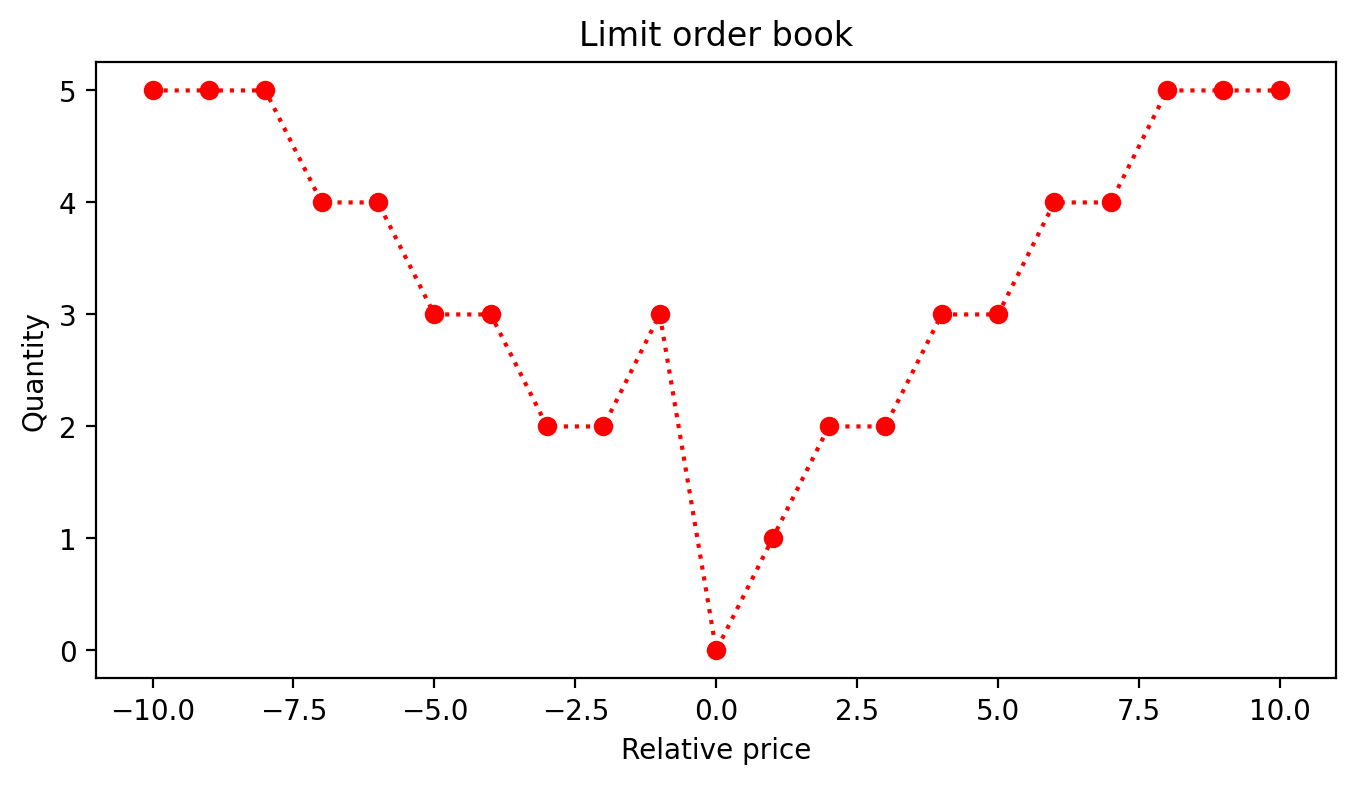

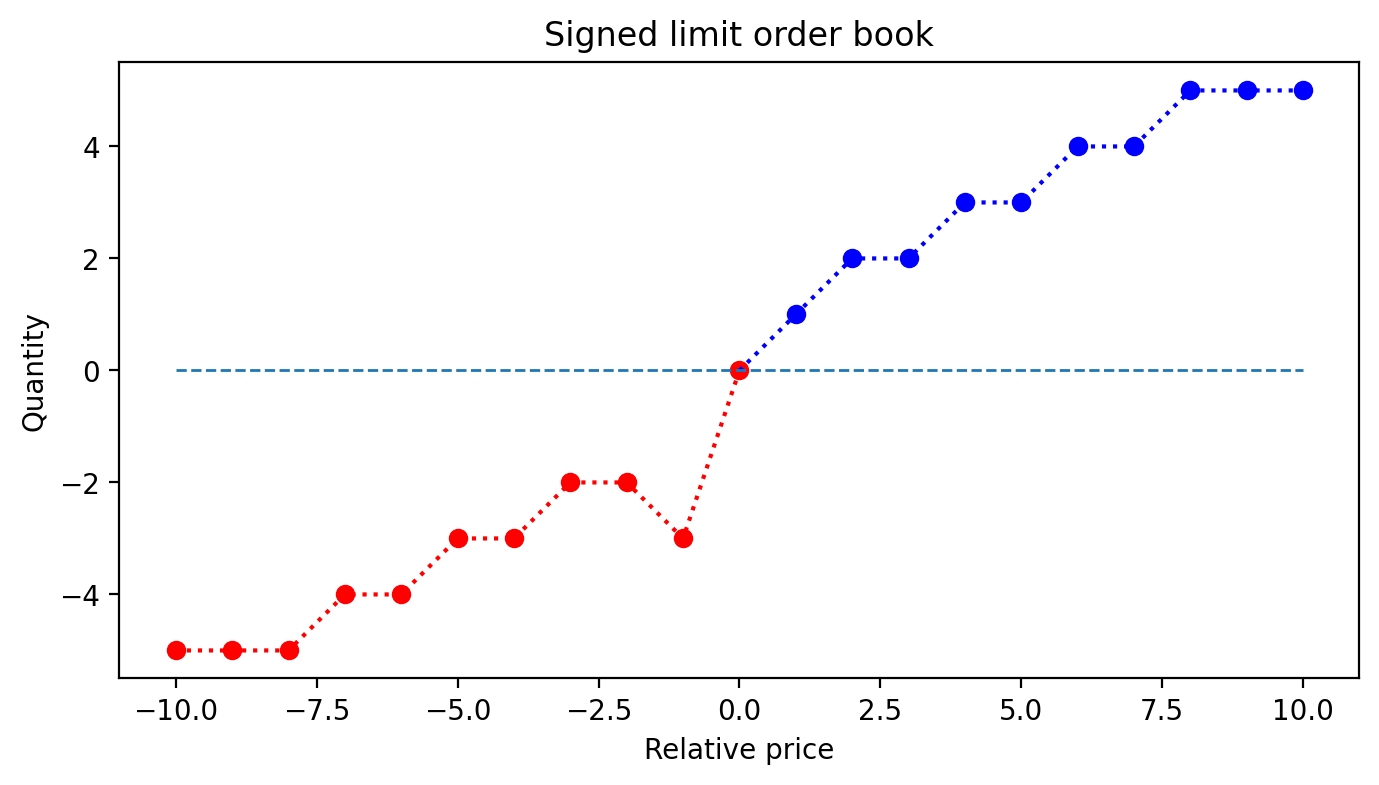

In [3]:
# Instanize ZI class with parameters
zi = ZI(mu=10, lmda=1, nu=1/5)

# Add two orders to the best bid side of the book
zi.limit_buy(zi.best_bid())
zi.limit_buy(zi.best_bid())

# Plot the order book
zi.book_plot()

# Plot the order book with signs
zi.book_plot(signed=True)

### 4. (16 points)

(a) Use the code supplied to simulate 100,000 events, computing the average book shape (in a band $\pm 20$ around the mid price) for the
following sets of parameters:

|Case| lambda| mu | nu |
|:-:|:--:|:--:|:----:|
|I| 1 | 10 | $\frac15$|
|II| 1 | 8 |  $\frac15$|
|III| 1 |  10 | $\frac16$|
|IV| 1  | 10 | $\frac18$| 

In each case, burn-in 1,000 events before kicking off the simulation. (Warning: This might take some time to run!).

(b) Generate a summary plot of the average book shapes for each parameter set (I, II, II, and IV).


(c) Verify that the relationships between the slopes of the order books at-the-money for each parameter set are consistent with the predictions from dimensional analysis.

(d) Verify that the asymptotic book depths are consistent with the predictions from dimensional analysis.

### <font color=blue> 4(a) Solution </font>

In [36]:
# Instanize  four ZI class with parameters
zi1 = ZI(mu=10, lmda=1, nu=1/5)
zi2 = ZI(mu=8, lmda=1, nu=1/5)
zi3 = ZI(mu=10, lmda=1, nu=1/6)
zi4 = ZI(mu=10, lmda=1, nu=1/8)

# Generate book shapes
avg_book_shape=[]
avg_book_shape1 = zi1.generate_events(n_events=100000)
avg_book_shape2 = zi2.generate_events(n_events=100000)
avg_book_shape3 = zi3.generate_events(n_events=100000)
avg_book_shape4 = zi4.generate_events(n_events=100000)


# Print book shapes
print(avg_book_shape1,avg_book_shape2,avg_book_shape3,avg_book_shape4)

[5.20378 5.11091 5.11221 5.05326 5.08121 5.01985 4.97811 4.93531 4.9538
 4.90576 4.85152 4.7321  4.5048  4.15502 3.80532 3.3722  2.94692 2.46479
 1.80728 1.10684 0.39163 0.75173 1.42356 2.13233 2.70152 3.22473 3.6352
 4.02334 4.35812 4.65967 4.83006 4.92236 5.00879 5.05811 5.08771 5.05939
 4.93945 5.02224 5.06855 5.07065 5.01554] [5.00044 4.998   5.04676 5.21703 5.14899 4.9868  5.05103 4.97339 5.04223
 5.03976 5.00888 5.0983  5.04169 4.82267 4.4371  3.94582 3.33038 2.86151
 2.19976 1.42577 0.45722 0.96173 1.79884 2.61583 3.3179  3.88514 4.24972
 4.56476 4.8099  4.88906 4.94822 4.98678 4.95182 4.96496 5.09743 5.16753
 5.19848 5.1704  5.06073 5.0145  4.91595] [5.90814 5.88996 5.9049  5.962   5.92521 5.92886 5.91624 5.88107 5.8928
 5.8182  5.69291 5.53127 5.25235 4.90589 4.54563 3.95457 3.3467  2.78151
 2.0541  1.30132 0.4251  0.90882 1.70512 2.51989 3.27784 3.99346 4.64005
 5.20579 5.61788 5.87825 6.05655 6.13686 6.05749 5.98074 5.98293 6.00918
 5.90144 5.8782  5.8447  5.92412 6.04001] [

### <font color=blue> 4(b) Solution </font>

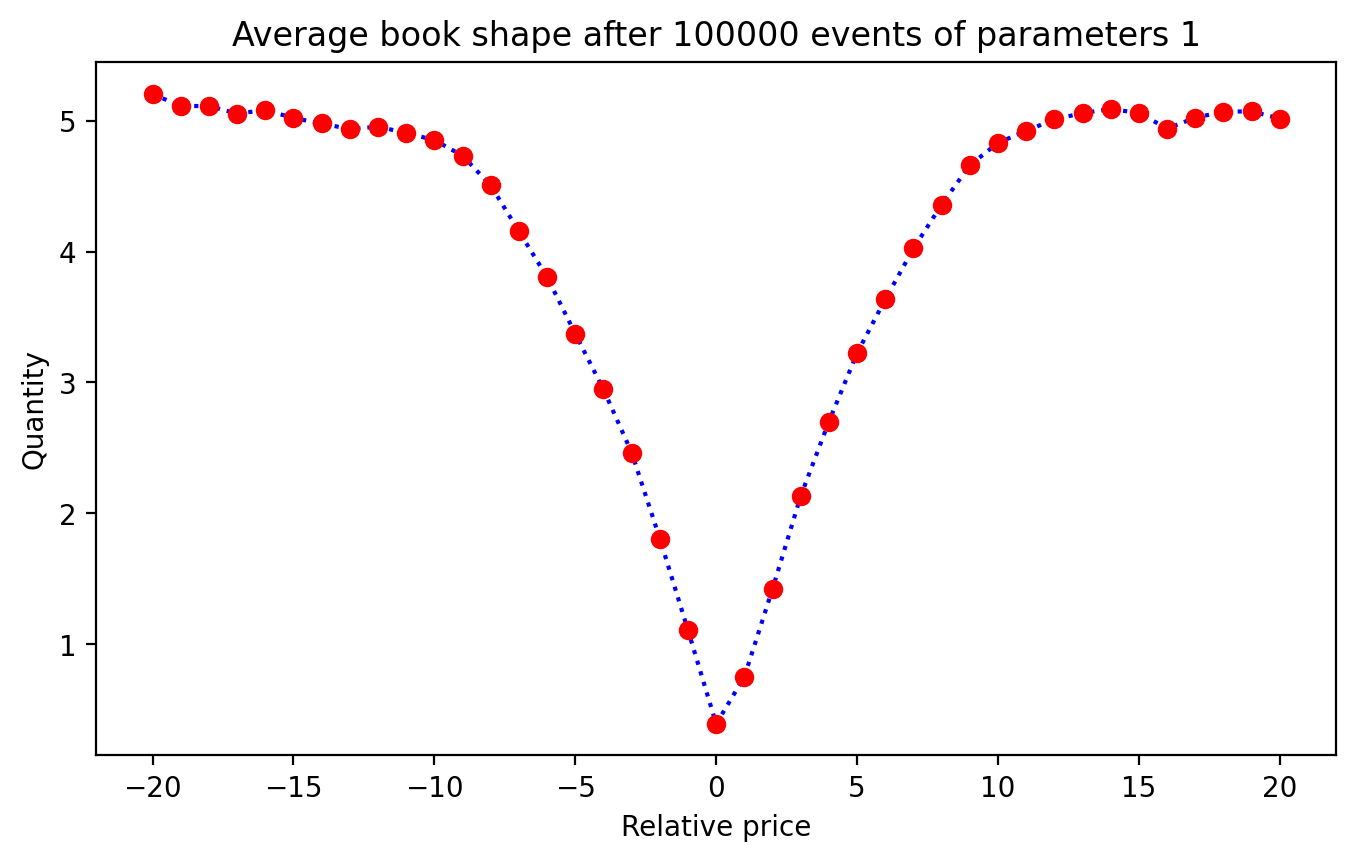

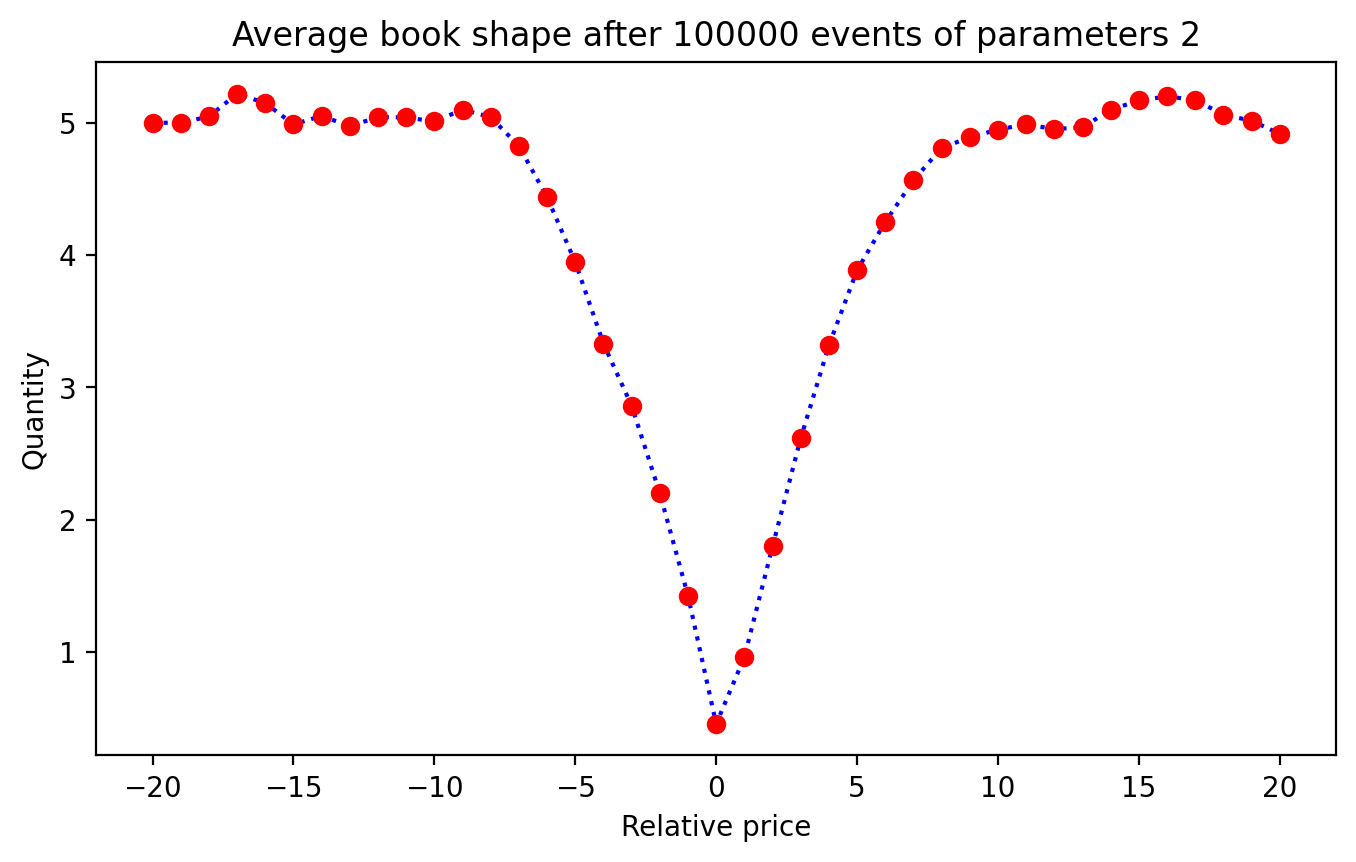

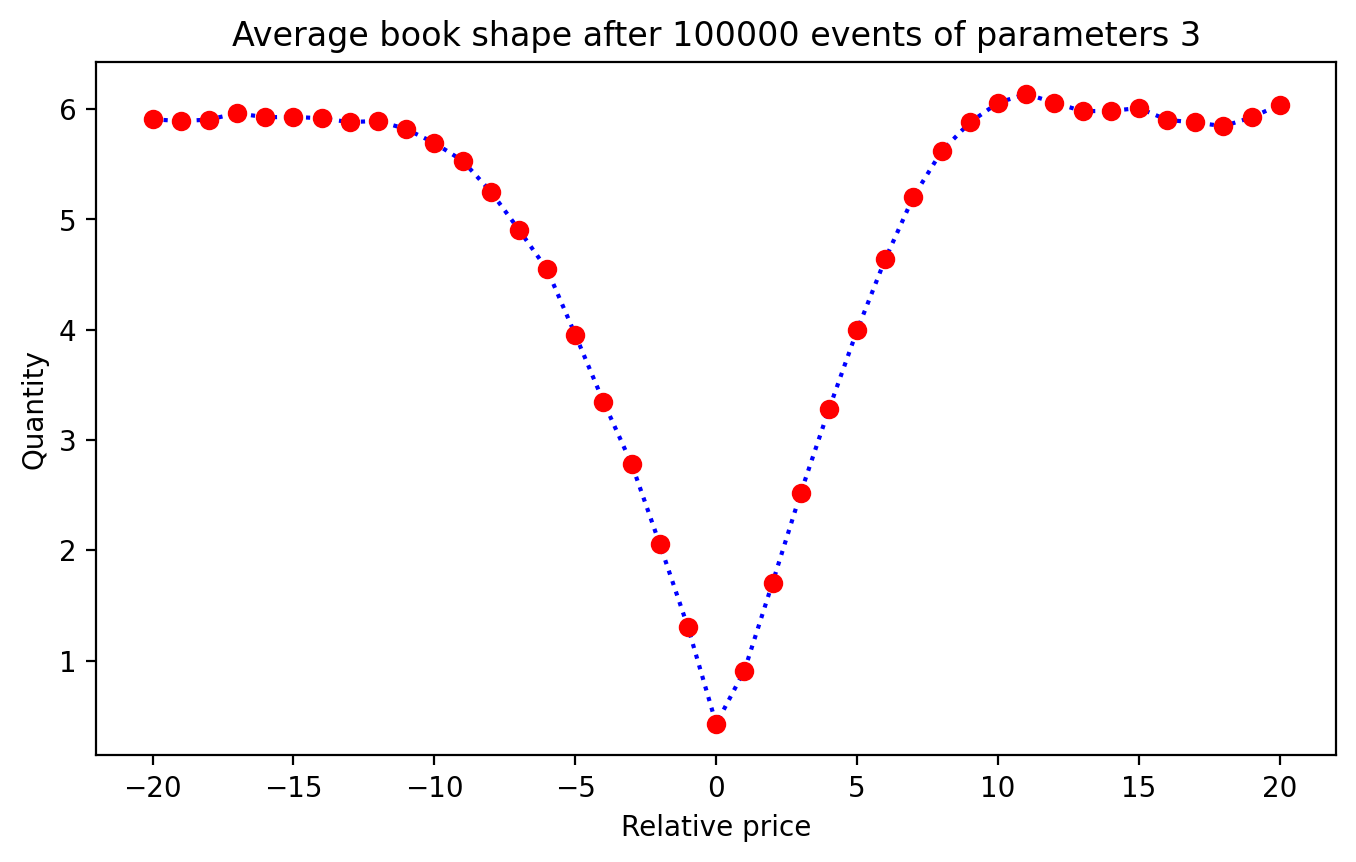

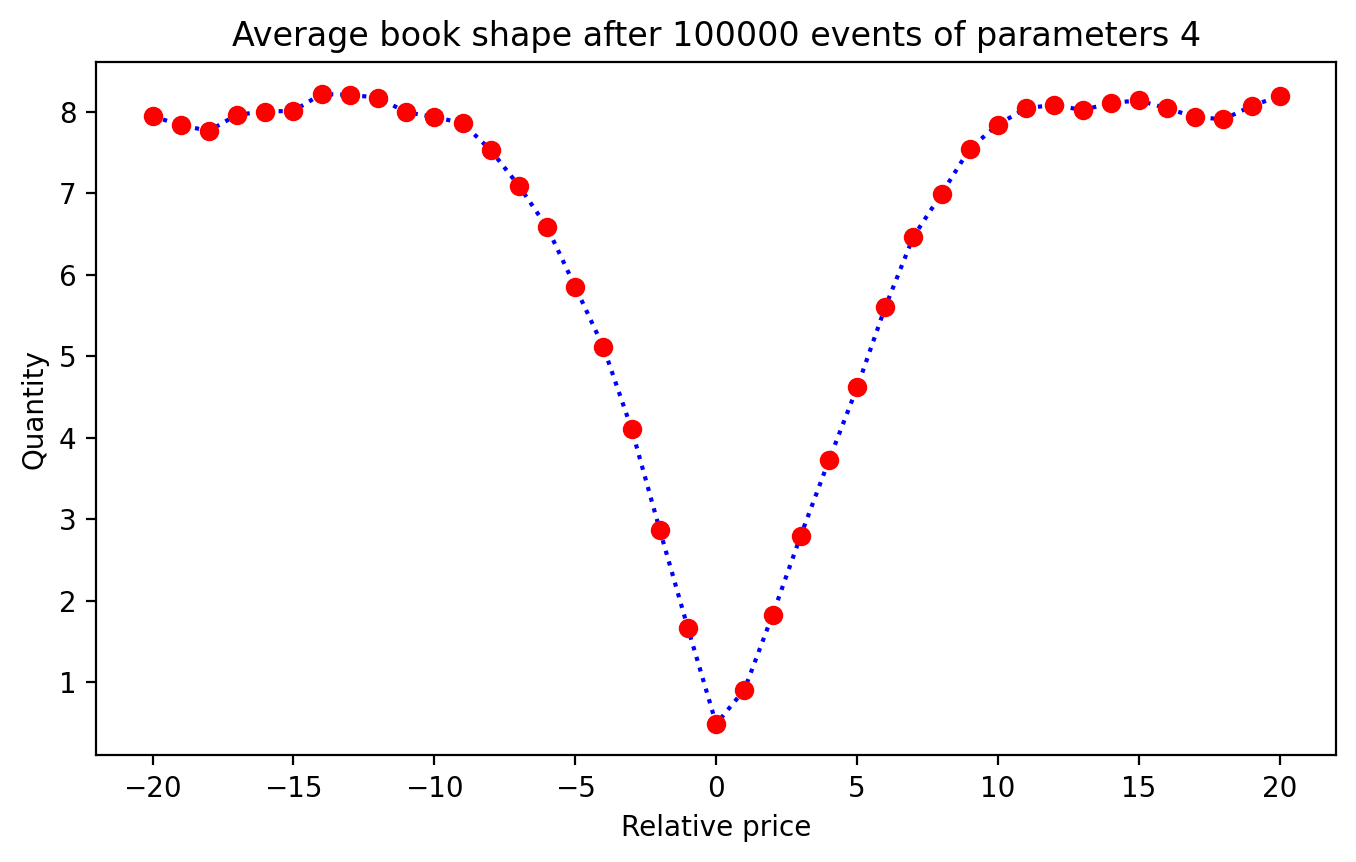

In [37]:
# plot average book shapes
def plot_avg_book(avg_book_shape, i):
    plt.figure(figsize=(8, 4.5))
    plt.plot([x for x in range(-20, 21)], avg_book_shape, 'b:')
    plt.plot([x for x in range(-20, 21)], avg_book_shape, 'ro')
    plt.title(f'Average book shape after 100000 events of parameters {i}')
    plt.xlabel('Relative price')
    plt.ylabel('Quantity')
    
plot_avg_book(avg_book_shape1,1)
plot_avg_book(avg_book_shape2,2)
plot_avg_book(avg_book_shape3,3)
plot_avg_book(avg_book_shape4,4)


### <font color=blue> 4(c) Solution </font>

The slope of the order books at the money from the predictions of dimensional analysis is $$
    \frac{\lambda^2}{\mu\,\nu}.
    $$
    
Write functions to calculate the analysis slope and actual slope. When it comes to actual slope, use the average of left and right slope.

In [38]:
# Calculate the slope given by dimensional analysis
def analysis_slope (zi):
    slp=zi.lmda/zi.mu*zi.lmda/zi.nu
    return slp

# Calculate the slope given by practical data
def actual_slope (band, avg_book_shape):
    center = band
    #print(avg_book_shape[band])
    slp1 = (avg_book_shape[center + 1] - avg_book_shape[center])
    slp2 = (avg_book_shape[center - 1] - avg_book_shape[center])
    #print(slp1)
    #print(slp2)
    return (slp1 + slp2) / 2

In [39]:
# compare the slopes of four parameters
print("Parameters 1- Analysis slope: ", analysis_slope(zi1), "Actual slope: ", actual_slope(20,avg_book_shape1))
print("Parameters 2- Analysis slope: ", analysis_slope(zi2), "Actual slope: ", actual_slope(20,avg_book_shape2))
print("Parameters 3- Analysis slope: ", analysis_slope(zi3), "Actual slope: ", actual_slope(20,avg_book_shape3))
print("Parameters 4- Analysis slope: ", analysis_slope(zi4), "Actual slope: ", actual_slope(20,avg_book_shape4))

Parameters 1- Analysis slope:  0.5 Actual slope:  0.5376549999996583
Parameters 2- Analysis slope:  0.625 Actual slope:  0.7365299999996524
Parameters 3- Analysis slope:  0.6000000000000001 Actual slope:  0.6799699999996137
Parameters 4- Analysis slope:  0.8 Actual slope:  0.7954199999997933


The slopes are close, but not perfectly align with each other.

### <font color=blue> 4(d) Solution </font>

The asymptotic book depths of the order books from the predictions of dimensional analysis is $$\frac{\lambda}{\nu}$$

 
Write functions to calculate the analysis depths and actual depths. When it comes to actual slope, use the average of the 15-th to 20-th depths.



In [43]:
# Calculate the depth given by dimensional analysis
def analysis_depth (zi):
    depth=zi.lmda/zi.nu
    return depth

# Calculate the depth given by practical data
def actual_depth (band, width, avg_book_shape):
    total=0
    for i in range(width):
        total += (avg_book_shape[width] + avg_book_shape[2*band-width])/2/width
    return total



In [44]:
# compare the depths of four parameters
print("Parameters 1- Analysis depth: ", analysis_depth(zi1), "Actual depth: ", actual_depth(20,5,avg_book_shape1))
print("Parameters 2- Analysis depth: ", analysis_depth(zi2), "Actual depth: ", actual_depth(20,5,avg_book_shape2))
print("Parameters 3- Analysis depth: ", analysis_depth(zi3), "Actual depth: ", actual_depth(20,5,avg_book_shape3))
print("Parameters 4- Analysis depth: ", analysis_depth(zi4), "Actual depth: ", actual_depth(20,5,avg_book_shape4))

Parameters 1- Analysis depth:  5.0 Actual depth:  5.039620000000401
Parameters 2- Analysis depth:  5.0 Actual depth:  5.077165000000571
Parameters 3- Analysis depth:  6.0 Actual depth:  5.969020000001128
Parameters 4- Analysis depth:  8.0 Actual depth:  8.072390000000835


The results align with each other.

### 5. (16 points)

Consider the Santa Fe model with $\lambda = 1$, $\mu = 10$, and $\nu = 1/5$. The aim of this assignment is to reproduce Figures 3 and 7 of Lecture 1.  

(a) For each size $q_b$ at best bid, create a 1,000-dimensional vector of simulated mid-prices after 100 events. Compute the mean mid-price, and the error in the mid-price computed as twice the standard deviation of the mean. (Warning: This takes 4 minutes to run on my machine!).

(b) For each size $q_b$ at best bid,  plot mean mid-price vs size $q_b$ at best bid, reproducing Figure 3 of the lecture slides. 
Remember to include error bars!

(c) Repeat part (b) with the order book imbalance $I = \frac{q_b - q_a}{q_b + q_a}$ on the $x$-axis, reproducing Figure 7 in the lecture slides.

(d) If you see an order book with large quantity at the bid and small quantity at the offer, what does it tell you about the future price?

### <font color=blue> 5(a) Solution </font>

The function below is used to give 1,000 simulations after 100 events and give the mid-prices.

In [45]:
def sim_mid(qb, lmda=1, mu=10, nu=1/5, simulations=1000, events=100):
    # The results
    results=[]
    
    # Simulations
    for sim in range(simulations):
        zi=ZI(lmda, mu, nu)
        #imbalance level is qb
        for i in range(qb):
            zi.limit_buy(zi.best_bid())
        zi.generate_events(events)
        results.append(zi.mid())
    return results


In [48]:
# Do the simulates and calculate the mean and variance
mean_prices_and_error=[]
for qb in range(1, 11):
    mid_prices = sim_mid(qb)
    mean=np.mean(mid_prices)
    error=2*np.std(mid_prices)/np.sqrt(999)
    print(qb,mean,error)
    mean_prices_and_error.append([qb,mean,error])

1 0.2455 0.09140171373269362
2 0.3775 0.08220543006841297
3 0.5415 0.07639336978394752
4 0.673 0.07023686508677061
5 0.775 0.06593821234950072
6 0.772 0.06769524833137586
7 0.8305 0.06291293219233259
8 0.762 0.05925314282749004
9 0.79 0.05894976738779446
10 0.8825 0.061494361989995125


### <font color=blue> 5(b) Solution </font>

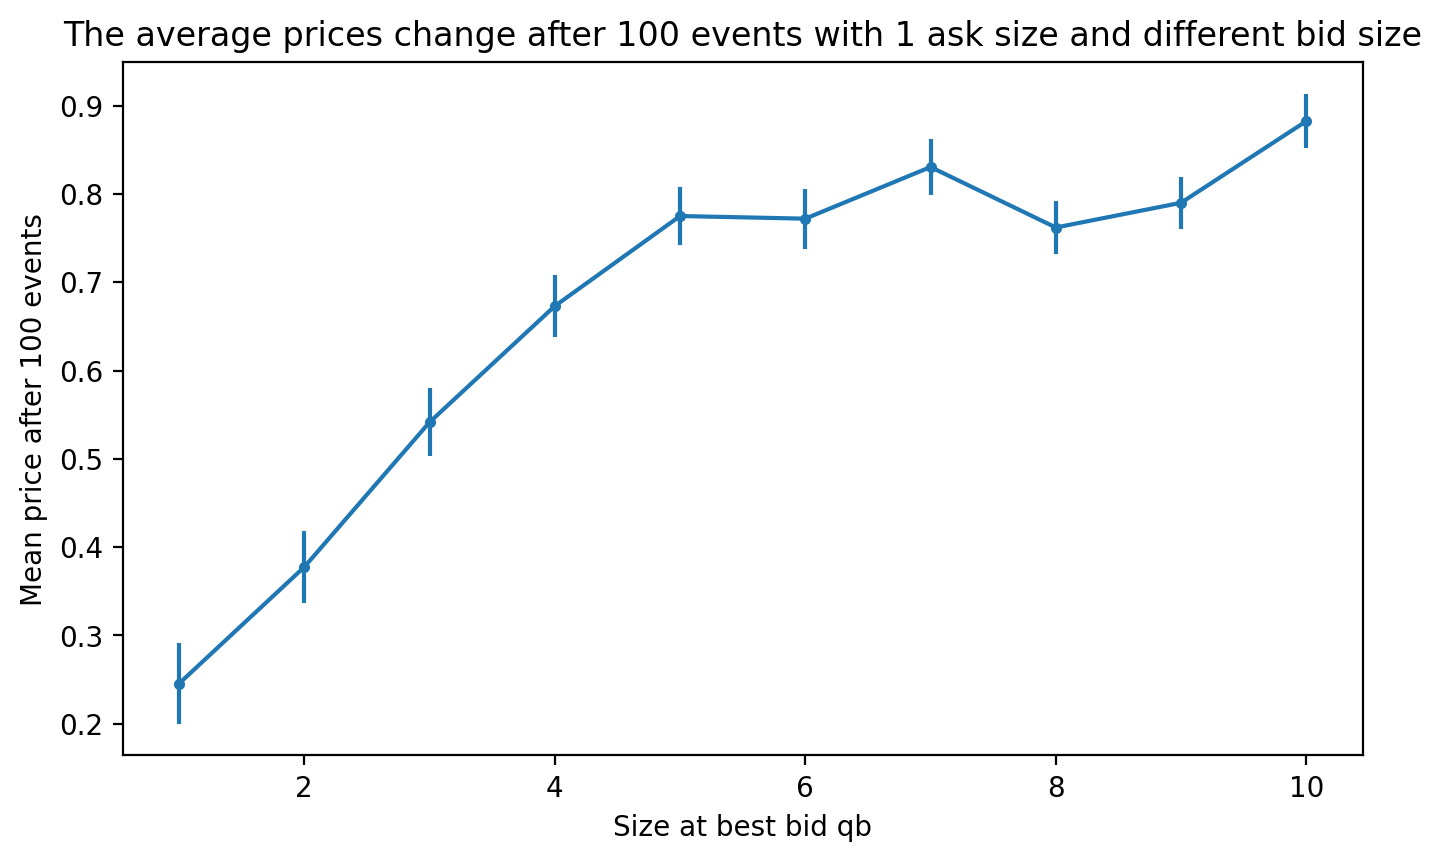

In [56]:
# Plot the means and errors on the qb
qb = [ele[0] for ele in mean_prices_and_error]
mean = [ele[1] for ele in mean_prices_and_error]
error = [ele[2]/2 for ele in mean_prices_and_error]
plt.figure(figsize=(8, 4.5))
plt.errorbar(qb,mean,error,marker=".")
plt.title("The average prices change after 100 events with 1 ask size and different bid size")
plt.xlabel("Size at best bid qb")
plt.ylabel("Mean price after 100 events")
plt.show()

### <font color=blue> 5(c) Solution </font>

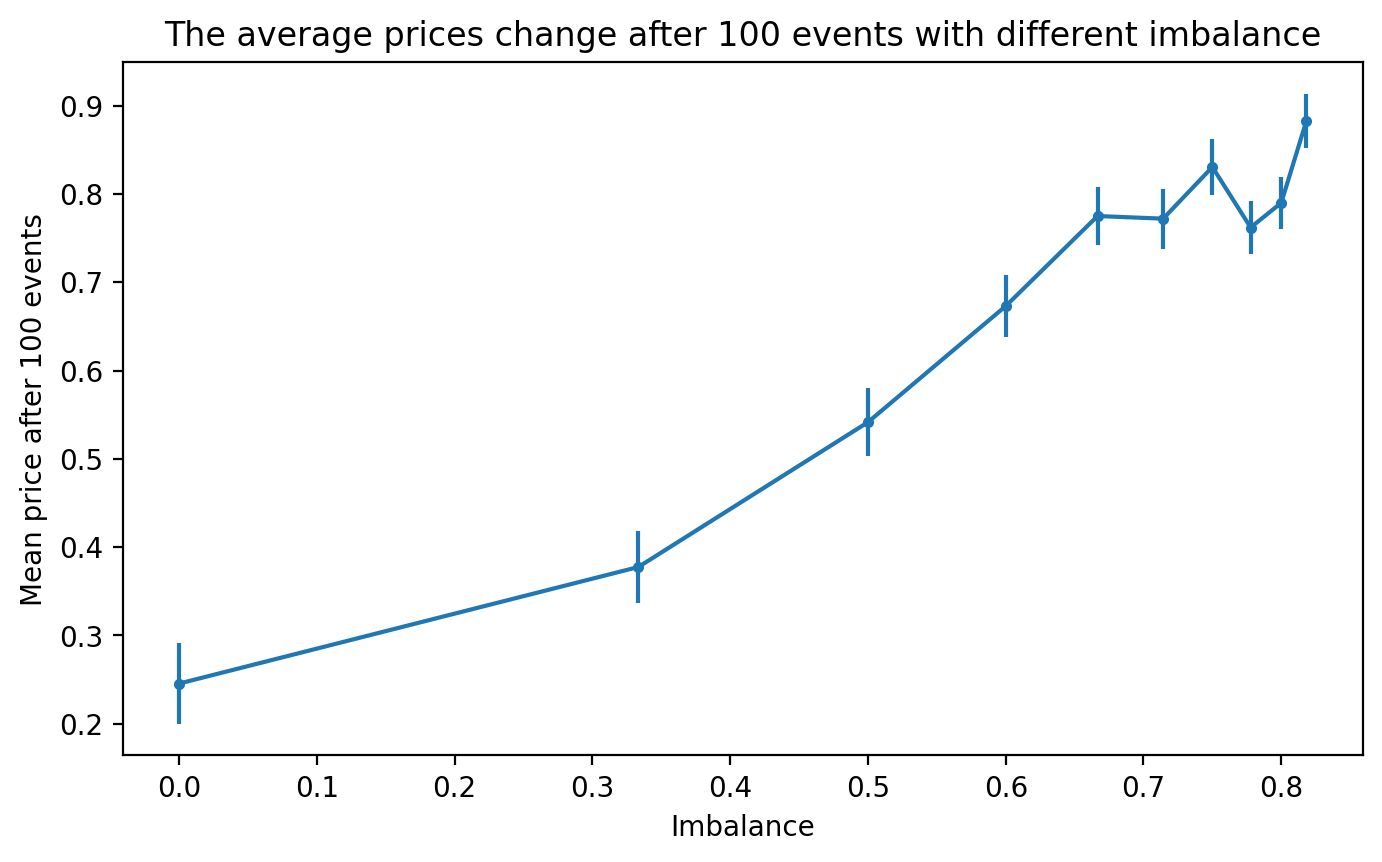

In [57]:
imbalance = [(ele-1)/(ele+1) for ele in qb]
plt.figure(figsize=(8, 4.5))
plt.errorbar(imbalance,mean,error,marker=".")
plt.title("The average prices change after 100 events with different imbalance")
plt.xlabel("Imbalance")
plt.ylabel("Mean price after 100 events")
plt.show()

### <font color=blue> 5(d) Solution </font>

The price is likely to increase on average given an order book with large quantity at the bid and small quantity at the offer. And the larger the proportion of bid and offer is, the more the price will change on average.